# Sachin Shanbhag 
### Data Hack, Analyst

### Commercial Experience

![Alt](./ge_logo.png "GE Logo")

* Built state-of-the-art X-Ray systems for GE Healthcare. 
* Developed advanced image processing algorithms using C++ on Real-time operating systems like VxWorks. 
* Designed and Developed 3-dimensional automatic hardware positioning systems for premium line of digital X-Ray systems.
* Managed Quality and P&L metrics for 80000 unit installed base spead across approx 370 flavors of Xray systems spanning about 40 years of development. 
* Managed field servicing, procurement and development activities for 3 segments of X-Ray products. 

![Alt](./python_logo.png "Python Logo")

* Big-Data Enthusiast
* Passionate analyst mindset. 
* Language of choice is Python: Pandas, Numpy, Matplotlib. 
* Interested in stats, advanced math. 
* Strong interest in ML theory and applications in new domains of emerging technologies like self-driving cars, AI, NLP etc. 

![Alt](./kaggle_logo.png "Kaggle Logo")

#### Beginning Kaggle-r (Let me know if is anyone interested in teaming up ! *srshanbhag@gmail.com* ) 



# Machine Learning

Machine learning is a field of computer science that involves the development of algorithms, and implementing them to predict patterns in data-set. These algorithms are then used to make predictions about a given variable(s) based on the pattern already learnt. 




Example applications of Machine Learning include 
1. spam filtering 
2. detection of network intruders or malicious insiders working towards a data breach 
3. optical character recognition (OCR) 
4. search engines and computer vision.

## Classification

## Classfication Example 1

Consider the following data set. It contains 10 features (columns) and based on the features the Target Classification is either 1 or 0 (Binary Classfication). The data is thus clearly separted into two clearly labelled groups '1' and '0' (numeric representation). Since the data is labelled, we can use k-Nearest Neighbors algorithms to group our test data. The data is randomly created to illustrate kNN, later on we'll see a more practical example. 

The goal is thus to find the most optimal value of k given the size of the dataset. We split up the data set in two parts, a train set and a test set. Scikit Learn has utility functions (train_test_split) that allows us to split the dataset and randomize the contents. 

Lets perform the initial setup do some exploratory data analysis. 

#### Import required libraries 
Initial setup. (Note Scikit learn modules are not imported right now but will be imported on a case-by-case basis to clearly illustrate the use of various classes during different steps. Once you're comfortable with Scikit-learn, feel free to include the modules in the begiining. )

In [4]:
import pandas as pd
import seaborn as sns                         # not so useful for knn but its my standard include nowadays - way too cool !! ;) 
import matplotlib.pyplot as plt               # always include - very handy to visualise data (scatterplots, histograms, x/y plots etc)
import numpy as np

# This is needed for Jupyter only . Used to print multiple lines in a cell. If this is not present, Jupyter only executes the last output statement. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# jupyter only command - tells jupyter to embed graphs as a cell 
%matplotlib inline             

#### Read the data 

Create the Dataframe. This is almost always the 2nd step after the setup. Also, as a good practise, print out the first few lines to make sure the reading went through fine and the columns and rows are labelled correctly. It doesnt hurt to open the raw file in a text editor to get a sense of the data. 

In [12]:
df = pd.read_csv("kNNDemo", index_col=0)     #pandas function to directly read in CSV files. the index_col param designates the first column as a row label
df.head(5)                                   #print out the first five rows.

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### Standardize the variables 

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Standardization means scaling the data set in such a way that numbers have a 0 mean and unit standard deviation. It does not matter if the data has a non-gaussian distribution. Our goal here is to scale the data set to a known range and standard deviation. 


In [23]:
# The StandardScaler class in SkLearn allows us to scale inputs to a standard normal distribution ()

from sklearn.preprocessing import StandardScaler

# Its a 3 step process. 
# First create the scaler class. 
# The constructor provides 'with_mean=True' and 'with_scale=True' default parameters that you can set to false individually 
# to suit your choice of scaling

Scaler = StandardScaler()

# "Fit" the scaler class to the data set ... the mean_ and scale_ store the mean and std-dev of the data set. 

Scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = Scaler.transform(df.drop('TARGET CLASS',axis=1))


Convert the above ndarray into pandas data frame 

In [27]:
# note the new scaled dataframe does not the target class 
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


#### Split the data set. 
Since we dont have a separate dataset to train our Classifier, we can use a subset of the current set to do so. Pandas provides a handy function to split and randomize a dataset. You can specify a percentage of the dataset to use as a training set. 

In [32]:
from sklearn.model_selection import train_test_split

# typically the names are a convention - x_train, y_train, x__test, y_test

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

#### Using the KNN Estimator
This is the main part where we use the kNN model. Algorithms in Scikit-learn are called 'Estimators' (guess they wanted 'model' to sound more serious and meaty: as against its more (in)famous counterpart walking down a ramp on Madison Ave)


In [33]:
# Create the classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


Note above that the 'n_neighbors' matrix represents 'k' in knn. 

Next we use the Estimator to fit the training set and then predict the values using the 'predict' function. 

In [34]:
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

#### Evaluate our model

This is the last step of any model/algorithm at the end of a training phase. We need to evaluate our model for accuracy before using it to make actual predictions. This is done because in the training phase, a model's parameters (in kNN its the 'k' ie the no. of nearest neigbors we use to calcuate distance)  are fine-tuned. Fine-tuning always leaves a difference between the actual and the predicted - this is called error. 

To evaluate a knn model, we use a table called "Confusion Matrix". For a simple binary classificaton as in our case, a confusion matrix looks like this - 

                    Predicted 0                     Predicted 1
    Actual 0          n1 (TN)                         n3 (FP, Type I Error)
    Actual 1          n2 (FN, Type II Error)          n4 (TP)

* n1, n2, n3, n4    - These are the split of the observations based on comparing the actual values with our model prediction values
* TN  - True negative -         Our model predicted 0  and the actual value was 0 as well
* TN  - True negative -         Our model predicted 1 and the actual value was 1 as well
* FN  - False Negative -        Also known as a **Type 2 Error**. Our model predicted 0 but the actual value was 1
* FP  - False Positive -        Also known as a **Type 1 Error**. Our model predicted 1 but the actual value was 0

These "simple" 1,0 values can have actual and devastating real world consequences imagine a scenario (our follow on example will be one of them) where - 
1= "I am very sorry but you have Cancer" diagnosis from your doctor, and 
0 = "I have some good news, you're doing fine. There's no tumor - just go on a vacation and take this stronger dosage for migraine". 

Which one would you rather have ? I'd much rather have have anything along the 1st row - here's why - (and remember that medicine is more nuanced than this model - thats y it takes 10 years to learn !)  
* TN - I'd Always want this ! of course. 
* FP - better tell me I have a disease even if I do not. At the most we go further along the medicine curve to nail down if we actualy do have it or find another root cause for the symptoms. 
* TP - Same as FP - only now its a question of money not my life. 
* FN - This is the deadliest ! - you go home happy but the symptoms persist and you return having been much further along the disease curve ! 0--{--|

So yea ... its important to test your model ... any model ! (...and medicinal / life science models are a lot more sophisticated (check out BioPython)  and their kNNs have a range of values for the Target Classifier. )


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))

[[144  12]
 [  6 138]]


As you can see, we still have 6 False Postives. Can we do better. We'll try in the next step. But first, lets get some more detail. 

In [41]:
print ("\nCLASSIFICATION REPORT for k= 1 \n")
print(classification_report(y_test,predictions))


CLASSIFICATION REPORT for k= 1 

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       156
          1       0.92      0.96      0.94       144

avg / total       0.94      0.94      0.94       300



First, a bit of an explainer. The Confusion matrix we obtained above can be further qualified using "rates". These rates are indicated in the columns of the classification report. 

* Precision - How accurate is a true prediction ? in other worlds, every time our model predicts yes, how often is it correct. (TP/total true predictions (TP+FP))
* Recall    - or known as the Sensitivity - given by TP/TP+FN - How accurately were we able to discover that the patient has a disease ?
* F1 Score  - harmonic mean of Precision and Recall

### Tweaking our model. 

Now given our generic example with random numbers its difficult to determine if its accurate enough. But we should always look to see if we can achieve a higher accuracy rate. For our kNN classifier, the only parameter to achieve this is the number of neighbors we choose to find the distances from. And in general, choosing k=1 is never a good idea. There are few general rules for a kNN classification - 

* For an even no of classes (eg binary has 2) choose k as num_classes+1
* for an odd no of classes choose an odd k. 

Lets try and have python make the decision for us. We will evaluate the fit for a range of k's and plot them against the error rate. Lets see what the output looks like. 

In [43]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

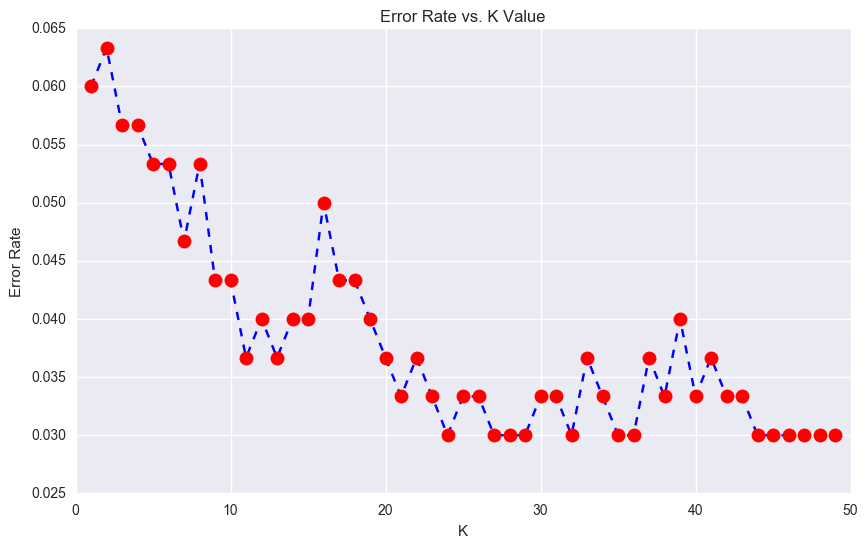

In [45]:
plt.figure(figsize=(10,6))

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)



As you can see, the error rate falls from 6% to 3% for increasing values of k. Is it relevant ? 

In the **medical world**, the answer is almost always yes. But in some other applications eg **Military**, one has to frequently tradeoff accuracy with compute power. Imagine a dataset with 100+ classes with a million + rows - ie real-time from onboard cameras for drones - you may choose to tradeoff accuracy for compute speed limited by hardware a few generations older than your desktop computer. 

For two main reasons 

1) Mission Critical decision making

2) ... well see, no one's really suing you ! 

In our choosing k=45 seems appropriate - lets get the evaluation reports with that value shall we ? 

In [49]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print ("Confusion Matrix for k= 45 \n")
print(confusion_matrix(y_test,predictions))
print ("\nCLASSIFICATION REPORT for k= 45 \n")
print(classification_report(y_test,predictions))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=45, p=2,
           weights='uniform')

Confusion Matrix for k= 1 

[[149   7]
 [  2 142]]

CLASSIFICATION REPORT for k= 1 

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       156
          1       0.95      0.99      0.97       144

avg / total       0.97      0.97      0.97       300



Now compare this to k = 1

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print ("Confusion Matrix for k= 1 \n")
print(confusion_matrix(y_test,predictions))
print ("\nCLASSIFICATION REPORT for k= 1 \n")
print(classification_report(y_test,predictions))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Confusion Matrix for k= 1 

[[144  12]
 [  6 138]]

CLASSIFICATION REPORT for k= 1 

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       156
          1       0.92      0.96      0.94       144

avg / total       0.94      0.94      0.94       300



### Real Life Classification Example

Now Lets take a look at a real data set. This is a series of samples from a Breast Cancer Study performed at the University of Wisconsin in the early 90's. It was donated to UC Irvine and now resides at (http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

A full description can be found at (http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names). But the relevant information is presented below. 

Number of Instances: 699 (as of 15 July 1992)
Number of Attributes: 10 plus the class attribute
Attribute Information: (class attribute has been moved to last column)
<table border="1">
    <tr align="center">
        <td></td>  <td><b>Attribute</b></td>   <td><b>Range or description</b></td>
    </tr>
    <tr align="center">        
        <td>1.</td>  <td> Sample code number </td>   <td> id number  </td>
    </tr>
    <tr align="center">        
        <td>2.</td>  <td>Clump Thickness </td>   <td>1 - 10</td>
    </tr>
    <tr align="center">        
        <td>3.</td>  <td> Uniformity of Cell Size</td>   <td>1 - 10 </td>
    </tr>
    <tr align="center">        
        <td>4.</td>  <td>Uniformity of Cell Shape </td>   <td>1 - 10 </td>
    </tr>
    <tr align="center">        
        <td>5.</td>  <td>Marginal Adhesion </td>   <td>1 - 10 </td>
    </tr>
    <tr align="center">        
        <td>6.</td>  <td>Single Epithelial Cell Size </td>   <td>1 - 10 </td>
    </tr>
    <tr align="center">        
        <td>7.</td>  <td>Bare Nuclei </td>   <td>1 - 10 </td>
    </tr>
    <tr align="center">        
        <td>8.</td>  <td>Bland Chromatin </td>   <td>1 - 10 </td>
    </tr>
    <tr align="center">        
        <td>9.</td>  <td>Normal Nucleoli </td>   <td>1 - 10 </td>
    </tr>
    <tr align="center">        
        <td>10.</td>  <td>Mitoses </td>   <td>1 - 10 </td>
    </tr>
    <tr align="center">        
        <td>11.</td>  <td>Class </td>   <td>(2 for benign, 4 for malignant) </td>
    </tr>
</table>


Missing attribute values: 16
    There are 16 instances in Groups 1 to 6 that contain a single missing (i.e., unavailable) attribute value, now denoted by "?".  

Class distribution:
 
   * Benign: 458 (65.5%)
   * Malignant: 241 (34.5%)


#### Initial housekeeping and observation notes. 

* The data set did not have columns. So I added columns based on the table shown above using a text editor. One can do it in pandas as well. Just felt this was easier. 
* **Class** is a binary variable. We would ideally like to use text labels given the required outcome but since its numpy we're using to crunch data, its best to keep the formats consistent. 
* Note that all of the features are restricted to a specific range 1 to 10. Hence we do not need to do initial scaling like we did in the first example. 
* An important step to consider is how to deal with Missing attribute values that figure in the dataset as 16. Lets replace it with a huge outlier so that most algorithms can figure out that this is an outlier. 

Now here's most of the code. 

In [12]:
# Note that since its the same notebook, we dont need to import again. 
# I'm just doing it for consistency. And Python wont complain. 

import pandas as pd
#import seaborn as sns                         
import matplotlib.pyplot as plt               
import numpy as np

#sklearn module imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline 

df = pd.read_csv("kNN-Breast-Cancer.csv",index_col=0 )    

#Important housekeeping step. Replace bad data cells with a huge outlier.
df.replace('?',-99999,inplace=True)

df.head(5)                                   

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=26, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=32, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=33, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=34, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=36, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=37, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=38, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=39, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=40, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=41, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=42, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=43, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=44, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=45, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=46, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=47, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=48, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='uniform')

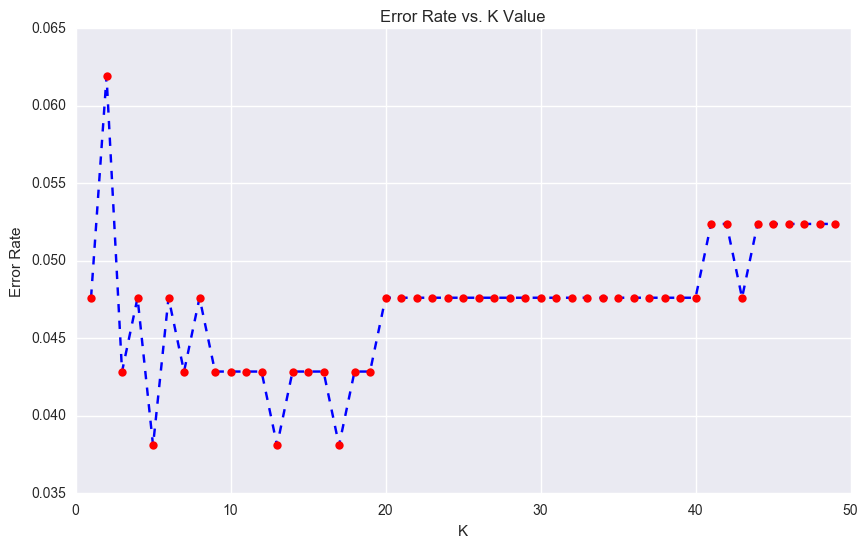

In [13]:


X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1),df['class'], test_size=0.30)

error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=6)    


As shown above, the error settles down somewhere between 5.5% and 4%. Lets pick k=18 (since accuracy has a premium )

In [14]:
#Evaluate the algorithm at k=18
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print ("Confusion Matrix for k= 1 \n")
print(confusion_matrix(y_test,predictions))
print ("\nCLASSIFICATION REPORT for k= 1 \n")
print(classification_report(y_test,predictions))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='uniform')

Confusion Matrix for k= 1 

[[132   2]
 [  9  67]]

CLASSIFICATION REPORT for k= 1 

             precision    recall  f1-score   support

          2       0.94      0.99      0.96       134
          4       0.97      0.88      0.92        76

avg / total       0.95      0.95      0.95       210

